<a href="https://colab.research.google.com/github/towmi06/Web_Analyze_Economy/blob/Algorithms/ttcs_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
file_path = '/content/gdrive/MyDrive/Colab Notebooks/Total (1).csv'
df1 = pd.read_csv(file_path, encoding='ISO-8859-1')

df1.head()

,STT,Country,Continents,Rate of users Internet (%),Smart Device (%),Revenue of e-commerce platforms (billion USD),Revenue of IT industry (billion USD),Funding in digital infrastructure (billion USD),Foreign investment capital (billion USD),CREDIT and BANKING digital transformation ratio(%),Number of Enterprises Applying Digital Transformation (bussiness),Economic Growth Rate of Education (% GDP),Number of technology start up businesses,Year
0,1,Algeria,Africa,47.0,68.0,0.50,0.80,0.10,1.50,0.0,12000,4.1,800,2014
1,2,Angola,Africa,15.0,44.3,0.25,0.37,0.10,3.66,0.0,15000,3.5,170,2014
2,3,Benin,Africa,13.0,55.0,0.12,0.07,0.10,0.41,0.0,10000,3.5,80,2014
3,4,Botswana,Africa,21.0,77.0,0.20,0.20,0.07,0.52,0.0,18000,6.0,280,2014
4,5,Burkina Faso,Africa,4.5,65.5,0.10,0.10,0.06,0.36,0.0,8000,4.0,55,2014


In [5]:
# view dimensions of dataset
df1.shape

(1463, 14)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 14 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   STT                                                                1463 non-null   int64  
 1   Country                                                            1463 non-null   object 
 2   Continents                                                         1463 non-null   object 
 3   Rate of users Internet (%)                                         1463 non-null   float64
 4   Smart Device  (%)                                                  1463 non-null   float64
 5   Revenue of e-commerce platforms (billion USD)                      1463 non-null   float64
 6   Revenue of IT industry (billion USD)                               1463 non-null   float64
 7   Funding in digital infra

In [7]:
#Sao chép dữ liệu
df = df1

In [8]:
df.tail()

,STT,Country,Continents,Rate of users Internet (%),Smart Device (%),Revenue of e-commerce platforms (billion USD),Revenue of IT industry (billion USD),Funding in digital infrastructure (billion USD),Foreign investment capital (billion USD),CREDIT and BANKING digital transformation ratio(%),Number of Enterprises Applying Digital Transformation (bussiness),Economic Growth Rate of Education (% GDP),Number of technology start up businesses,Year
1458,1459,Malaysia,Southeast Asia,93.0,95.0,560.000,5.120,0.65,0.0,60.0,75000,5.6,5500,2024
1459,1460,Indonesia,Southeast Asia,80.0,92.0,580.000,5.590,0.60,3.9,60.0,130000,5.0,4800,2024
1460,1461,Philippines,Southeast Asia,80.0,96.0,10.000,2.260,0.55,0.4,50.0,65000,4.7,5000,2024
1461,1462,Brunei,Southeast Asia,97.5,94.0,0.150,0.073,0.13,0.4,50.0,30000,3.1,250,2024
1462,1463,Timor-Leste,Southeast Asia,40.0,82.0,0.012,0.040,0.05,0.0,50.0,3500,5.6,110,2024


In [9]:
df['Country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cabo Verde (Cape Verde)', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros',
       'Congo, Democratic Republic of the (DR Congo)',
       'Congo, Republic of the (Republic of the Congo)', 'Djibouti',
       'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini (Swaziland)',
       'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       "Ivory Coast (Côte d'Ivoire)", 'Kenya', 'Lesotho', 'Liberia',
       'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania',
       'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 'Canada',
       'The United States', 'Mexico', 'Belize', 'Costa Rica',
       'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Pan

In [10]:
# drop stt
df = df.drop(columns=['STT'])

In [11]:
df.head()

,Country,Continents,Rate of users Internet (%),Smart Device (%),Revenue of e-commerce platforms (billion USD),Revenue of IT industry (billion USD),Funding in digital infrastructure (billion USD),Foreign investment capital (billion USD),CREDIT and BANKING digital transformation ratio(%),Number of Enterprises Applying Digital Transformation (bussiness),Economic Growth Rate of Education (% GDP),Number of technology start up businesses,Year
0,Algeria,Africa,47.0,68.0,0.50,0.80,0.10,1.50,0.0,12000,4.1,800,2014
1,Angola,Africa,15.0,44.3,0.25,0.37,0.10,3.66,0.0,15000,3.5,170,2014
2,Benin,Africa,13.0,55.0,0.12,0.07,0.10,0.41,0.0,10000,3.5,80,2014
3,Botswana,Africa,21.0,77.0,0.20,0.20,0.07,0.52,0.0,18000,6.0,280,2014
4,Burkina Faso,Africa,4.5,65.5,0.10,0.10,0.06,0.36,0.0,8000,4.0,55,2014


In [12]:
# Kiểm tra các giá trị bị thiếu
print(df.isnull().sum())


Country                                                              0
Continents                                                           0
Rate of users Internet (%)                                           0
Smart Device  (%)                                                    0
Revenue of e-commerce platforms (billion USD)                        0
Revenue of IT industry (billion USD)                                 0
Funding in digital infrastructure (billion USD)                      0
Foreign investment capital (billion USD)                             0
CREDIT and BANKING digital transformation ratio(%)                   0
Number of Enterprises Applying Digital Transformation (bussiness)    0
Economic Growth Rate of Education (% GDP)                            0
Number of technology start up businesses                             0
Year                                                                 0
dtype: int64


In [25]:
# Target and feature selection
y = df['CREDIT and BANKING digital transformation ratio(%)']
X = df.drop(['Year', 'Country', 'Continents', 'Revenue of e-commerce platforms (billion USD)',
             'Economic Growth Rate of Education (% GDP)', 'Number of technology start up businesses', 'CREDIT and BANKING digital transformation ratio(%)'], axis=1)

In [26]:
X.shape

(1463, 6)

In [27]:
X.head()

,Rate of users Internet (%),Smart Device (%),Revenue of IT industry (billion USD),Funding in digital infrastructure (billion USD),Foreign investment capital (billion USD),Number of Enterprises Applying Digital Transformation (bussiness)
0,47.0,68.0,0.80,0.10,1.50,12000
1,15.0,44.3,0.37,0.10,3.66,15000
2,13.0,55.0,0.07,0.10,0.41,10000
3,21.0,77.0,0.20,0.07,0.52,18000
4,4.5,65.5,0.10,0.06,0.36,8000


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ensure X and y have equal samples
X = X[:len(y)]
y = y[:len(X)]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
X_train.shape

(1170, 6)

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Khởi tạo mô hình
model = RandomForestRegressor(random_state=42)

# Định nghĩa các tham số cần tối ưu thêm
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, 50, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}

# Sử dụng GridSearchCV để tìm các tham số tốt nhất
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,
                           n_jobs=-1, verbose=2, scoring='r2')

# Huấn luyện mô hình
grid_search.fit(X_train_scaled, y_train)

# Lấy mô hình tốt nhất từ grid search
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


In [37]:
# Dự đoán với mô hình tốt nhất
y_pred = best_model.predict(X_test_scaled)

# Tính toán các chỉ số đánh giá
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# In ra các chỉ số đánh giá
print("Best Parameters:", grid_search.best_params_)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Root Mean Squared Error: 17.18
R-squared (R²): 0.59


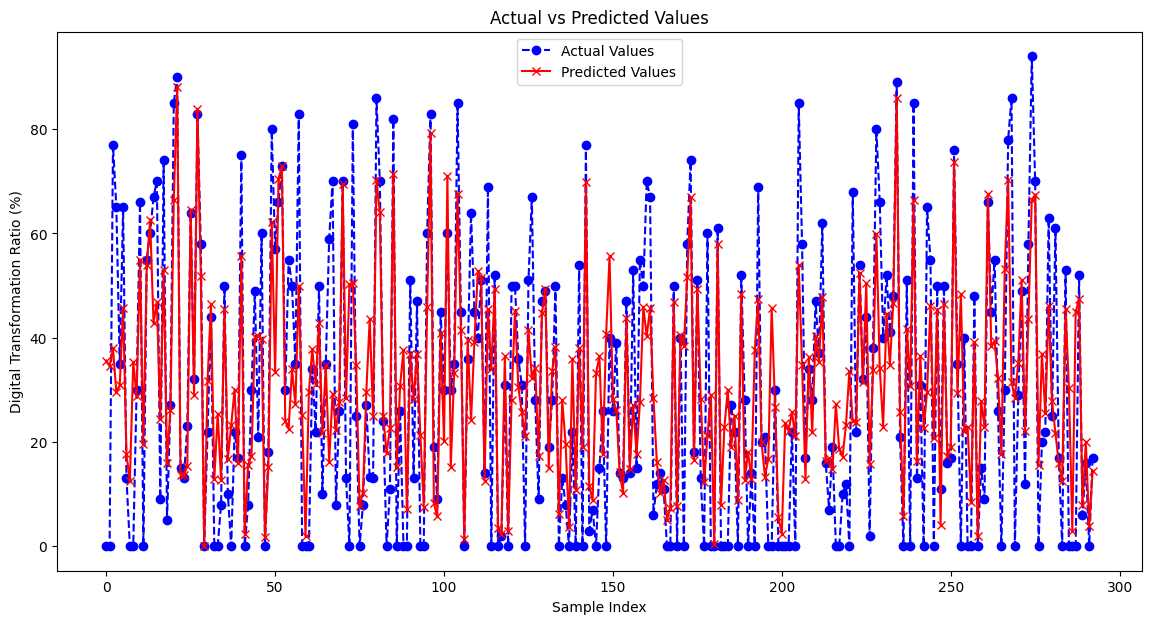

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Sắp xếp lại chỉ số để phù hợp với thứ tự dữ liệu
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred, name="Predicted")

# Vẽ biểu đồ đường
plt.figure(figsize=(14, 7))
plt.plot(y_test, label="Actual Values", color="blue", linestyle="--", marker='o')
plt.plot(y_pred, label="Predicted Values", color="red", linestyle="-", marker='x')
plt.title("Actual vs Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Digital Transformation Ratio (%)")
plt.legend()
plt.show()


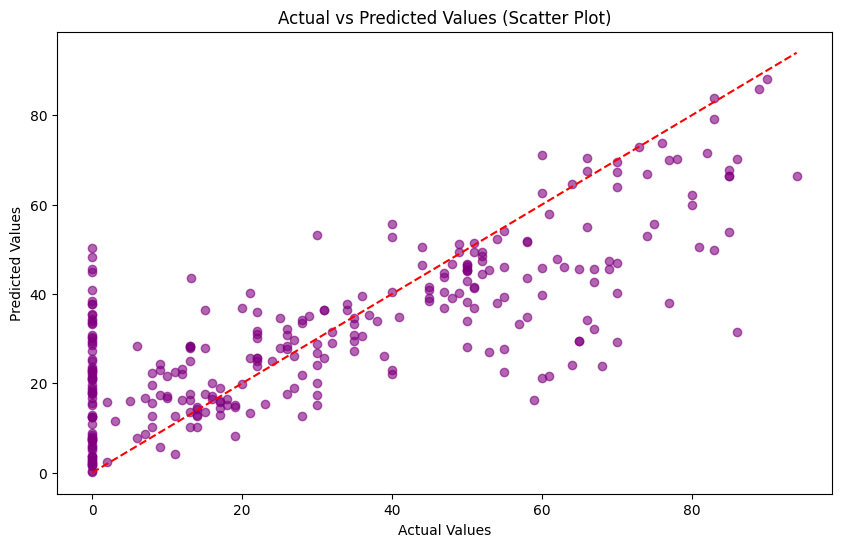

In [43]:
# Vẽ biểu đồ phân tán để kiểm tra độ chính xác của dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Scatter Plot)")
plt.show()

Điểm nào càng gần đường chéo lý tưởng thì càng chính xác

In [40]:
# Đảm bảo y_test và y_pred có cùng độ dài
min_length = min(len(y_test), len(y_pred))
y_test_trimmed = y_test[:min_length]
y_pred_trimmed = y_pred[:min_length]

# Tạo DataFrame để so sánh dữ liệu thực tế và dữ liệu dự đoán
comparison_df = pd.DataFrame({
    'Actual': y_test_trimmed.values,
    'Predicted': y_pred_trimmed
})

# In ra DataFrame
print(comparison_df)


     Actual  Predicted
0       0.0    35.6124
1       0.0    34.5160
2      77.0    37.9392
3      65.0    29.5568
4      35.0    30.8980
..      ...        ...
288    52.0    47.4540
289     6.0     7.8660
290    16.0    20.0780
291     0.0     3.7860
292    17.0    14.3836

[293 rows x 2 columns]
